In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
# nicer looking default plots
plt.style.use('bmh')
from scipy import optimize as opt
from scipy import special as sp
from scipy import misc
from scipy.linalg import det
from scipy.misc import factorial
import mpmath

In [9]:
def u(a,x):
    denominator = 1#2**(-1./4.-0.5*a)*sp.gamma(1/4.-0.5*a)
    return float(mpmath.pcfd(-a-1./2.,x)/denominator)

def dfunction(x,a,c,X):
    return u(a,np.sqrt(2/c)*(x+X))

def func(e_, eF, b, X):
    if isinstance(e_,float):
        e = e_
    else:
        e = e_[0]
    
    if abs(e)>1:
        return 1
    
    c = 2*eF/b
    ky = X/c
    
    ep = eF + e
    em = eF - e
    
    g = 1./(e+1j*np.sqrt(1-e**2))
    gc = 1./(e-1j*np.sqrt(1-e**2))
    
    lp = np.sqrt(1-ky**2+1j*np.sqrt(1-e**2)/eF)
    lm = np.sqrt(1-ky**2-1j*np.sqrt(1-e**2)/eF)
    
    chip = u(-ep/b, np.sqrt(2/c)*(-X))
    chim = u(-em/b, np.sqrt(2/c)*X)
    
    dchip = misc.derivative(dfunction,0,args=(-ep/b,c,-X))
    dchim = misc.derivative(dfunction,0,args=(-em/b,c,X))
    
    #dchip = np.sqrt(2/c)*du(-ep/b, np.sqrt(2/c)*(-X))
    #dchim = np.sqrt(2/c)*du(-em/b, np.sqrt(2/c)*X)
        
    matrix = np.array([[chip, 0, g, gc],
                       [0, chim, 1, 1],
                       [dchip, 0, 1j*g*lm, -1j*gc*lp],
                       [0, dchim, 1j*lm, -1j*lp]])
    D = det(matrix)
    
    return np.absolute(D)

X 0.632455532034


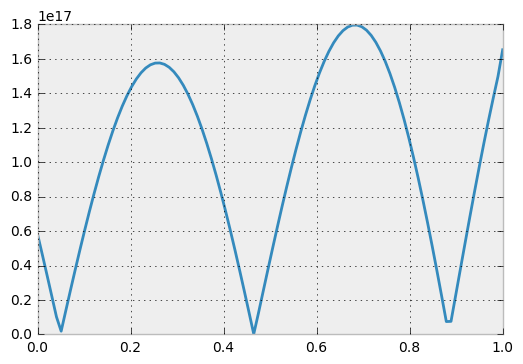

In [10]:
N = 100
b = 0.5
eF = 10.
X = 0.1*np.sqrt(40.)

print('X',X)

e = np.linspace(0.,1.,N)
res = np.zeros(e.shape)

for i in range(N):
    res[i] = func(e[i], eF, b, X)

plt.plot(e,res)
plt.show()


C:\Users\Anna\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


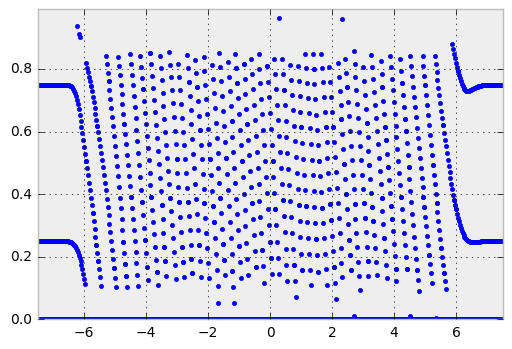

In [11]:
N = 500
n =5
eF = 10.
b = 0.5
e0 = np.linspace(0,1,n)

xmin = -7.5
xmax = 7.5
emin = 0
emax = 0.99

x = np.linspace(xmin,xmax,N)
e = np.zeros((n,N))

for i in range(N):
    X = x[i]*np.sqrt(40)
    for j in range(n):
        e[j][i] = opt.fsolve(func,e0[j],args=(eF,b,X))


for i in range(n):
    plt.plot(x,e[i][:],'.b')
plt.axis([xmin,xmax,emin,emax])
#plt.plot(x,e,'.')

plt.show()

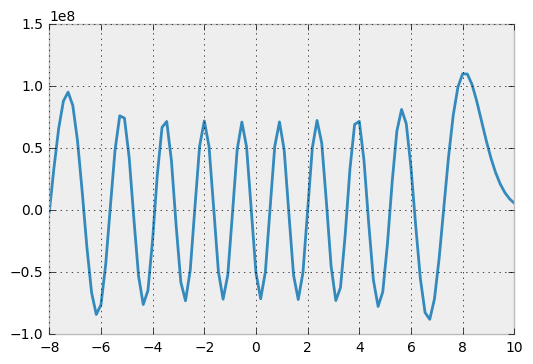

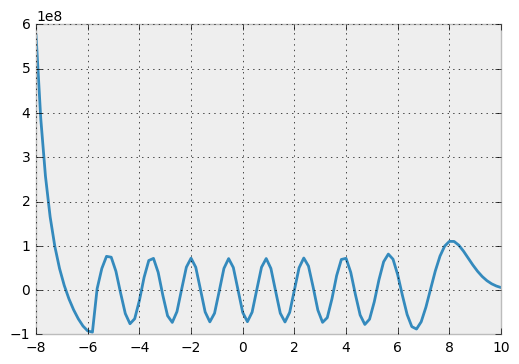

In [5]:
a = 18.5
x = np.linspace(-8,10,100)
y = np.zeros(x.shape)
z = np.zeros(x.shape)
for i in range(100):
    y[i] = mpmath.pcfd(a,x[i])
    z[i] = sp.pbdv(a,x[i])[0]
    
plt.plot(x,y)
plt.show()
plt.plot(x,z)
plt.show()